# OpenCV Demo

## Import Libraries

In [79]:
!pip install opencv-python
import cv2
print(cv2.__version__)

4.2.0


In [80]:
import matplotlib.pyplot as plt
import numpy as np

## Import a picture

In [81]:
ls ../assets/img

gray_noboru.jpg  hsv_noboru.jpg   noboru.jpg


In [82]:
img_bgr = cv2.imread('../assets/img/noboru.jpg')
print(img_bgr)

[[[191 183 170]
  [191 183 170]
  [191 183 170]
  ...
  [226 171 102]
  [226 171 102]
  [226 171 102]]

 [[191 183 170]
  [191 183 170]
  [191 183 170]
  ...
  [226 171 102]
  [226 171 102]
  [226 171 102]]

 [[192 184 171]
  [192 184 171]
  [192 184 171]
  ...
  [226 171 102]
  [226 171 102]
  [226 171 102]]

 ...

 [[ 14   7   4]
  [ 15   9   4]
  [ 19  13   8]
  ...
  [ 85 101 160]
  [ 67  91 157]
  [ 43  68 140]]

 [[ 12   7   6]
  [ 11   6   3]
  [ 12   8   3]
  ...
  [ 87 103 172]
  [ 61  84 162]
  [ 52  79 160]]

 [[ 10   6   5]
  [  8   5   1]
  [  8   3   0]
  ...
  [ 93 110 183]
  [ 63  87 171]
  [ 52  79 166]]]


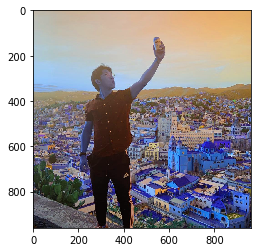

In [83]:
plt.imshow(img_bgr)
plt.show()

In [84]:
# print shape of img_bgr
x = np.array(img_bgr)
print(x.shape)

(960, 960, 3)


## Convert the color of the picture

### BGR to RGB

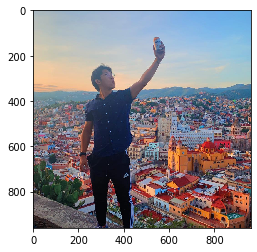

In [85]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### BGR to HSV

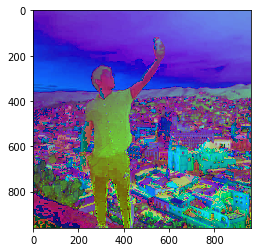

In [86]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

### RGB to GRAY

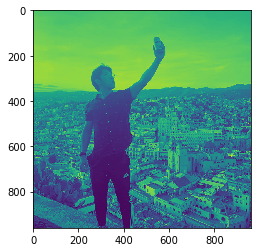

In [87]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

In [88]:
cv2.imwrite('../assets/img/hsv_noboru.jpg', img_hsv)
cv2.imwrite('../assets/img/gray_noboru.jpg', img_gray)

True

In [89]:
ls ../assets/img/

gray_noboru.jpg  hsv_noboru.jpg   noboru.jpg


## Trimming 

In [90]:
size = img_rgb.shape
print(size)

(960, 960, 3)


In [91]:
top_left = img_rgb[:size[0]//2, :size[1]//2]
print(top_left.shape)

(480, 480, 3)


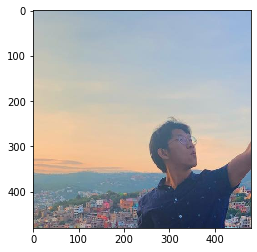

In [92]:
plt.imshow(top_left)
plt.show()

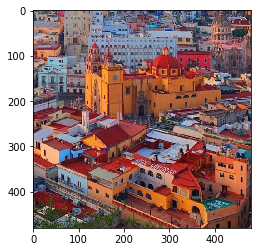

In [93]:
bottom_right = img_rgb[size[0]//2:, size[1]//2:]
plt.imshow(bottom_right)
plt.show()

## Resizing

In [94]:
resized_img = cv2.resize(img_rgb, (img_rgb.shape[0]*2, img_rgb.shape[1]*2))
print(resized_img.shape)

(1920, 1920, 3)


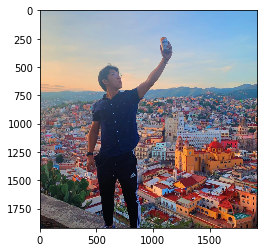

In [95]:
plt.imshow(resized_img)
plt.show()

(96, 96, 3)


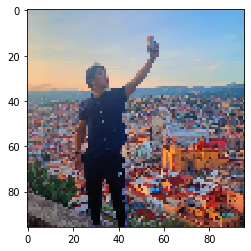

In [96]:
resized_img = cv2.resize(img_rgb, (img_rgb.shape[0]//10, img_rgb.shape[1]//10))
print(resized_img.shape)
plt.imshow(resized_img)
plt.show()

## Rotating

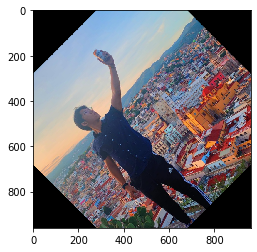

In [97]:
mat = cv2.getRotationMatrix2D(tuple(np.array(img_rgb.shape[:2])/2), 45, 1.0)
result_img = cv2.warpAffine(img_rgb, mat, img_rgb.shape[:2])

plt.imshow(result_img)
plt.show()

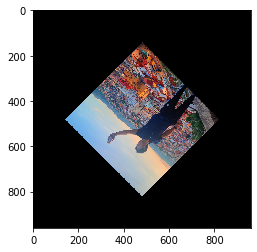

In [98]:
mat = cv2.getRotationMatrix2D(tuple(np.array(img_rgb.shape[:2])/2), 135, .5)
result_img = cv2.warpAffine(img_rgb, mat, img_rgb.shape[:2])

plt.imshow(result_img)
plt.show()

## Change color tone

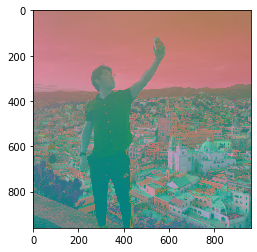

In [99]:
result_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

plt.imshow(result_img)
plt.show()

## Binarization

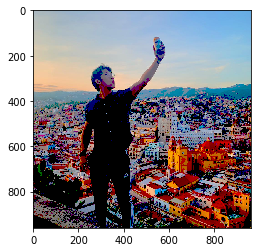

In [100]:
## use cv2.threshold to binarize the image 

retval, result_img = cv2.threshold(img_rgb, 95, 128, cv2.THRESH_TOZERO)

plt.imshow(result_img)
plt.show()

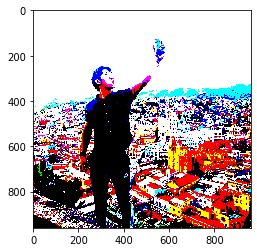

In [101]:
retval, result_img = cv2.threshold(img_rgb, 100, 255, cv2.THRESH_BINARY)

plt.imshow(result_img)
plt.show()

## Blurring

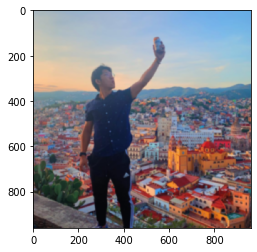

In [102]:
result_img = cv2.GaussianBlur(img_rgb, (15, 15), 0)

plt.imshow(result_img)
plt.show()

## Denoising

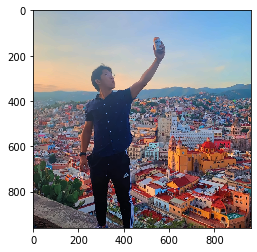

In [103]:
result_img = cv2.fastNlMeansDenoisingColored(img_rgb)

plt.imshow(result_img)
plt.show()

## Morphology Processing

### Dilate

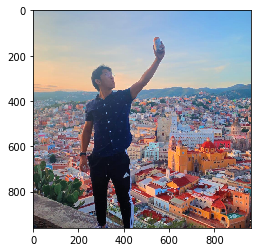

In [104]:
filt = np.array([[0,1,0],[1,0,1],[0,1,0]], np.uint8)

result_img = cv2.dilate(img_rgb, filt)

plt.imshow(result_img)
plt.show()

### Erode

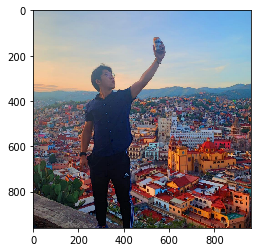

In [105]:
filt = np.array([[0,1,0],[1,0,1],[0,1,0]], np.uint8)

result_img = cv2.erode(img_rgb, filt)

plt.imshow(result_img)
plt.show()

## Contouring

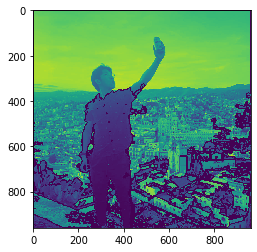

In [106]:
retval, thresh = cv2.threshold(img_gray, 88, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result_img = cv2.drawContours(img_gray, contours, -1, (0, 0, 255), 3)

plt.imshow(result_img)
plt.show()

## Data Augmentation

In [107]:
import os

def make_image(input_img):
  img_size = input_img.shape
  filter_one = np.ones((3,3))

  # rotation
  mat1 = cv2.getRotationMatrix2D(tuple(np.array(input_img.shape[:2])/2), 23, 1)
  mat2 = cv2.getRotationMatrix2D(tuple(np.array(input_img.shape[:2])/2), 144, 0.8)

  # augmentation
  fake_method_array = np.array([
                                lambda image: cv2.warpAffine(image, mat1, x.shape[:2]),
                                lambda image: cv2.warpAffine(image, mat2, x.shape[:2]),
                                lambda image: cv2.threshold(image, 100, 255, cv2.THRESH_TOZERO)[1],
                                lambda image: cv2.GaussianBlur(image, (5,5), 0),
                                lambda image: cv2.resize(cv2.resize(image, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0])),
                                lambda image: cv2.erode(image, filter_one),
                                lambda image: cv2.flip(image, 1),
  ])

  images=[]

  for method in fake_method_array: 
    faked_img = method(input_img)
    images.append(faked_img)

  return images 

target_img = cv2.imread("../assets/img/noboru.jpg")

fake_images = make_image(target_img)


if not os.path.exists("../assets/img/fake_images"):
  os.mkdir("../assets/img/fake_images")

for number, img in enumerate(fake_images):
  cv2.imwrite("../assets/img/fake_images/"+ str(number) + ".jpg", img)

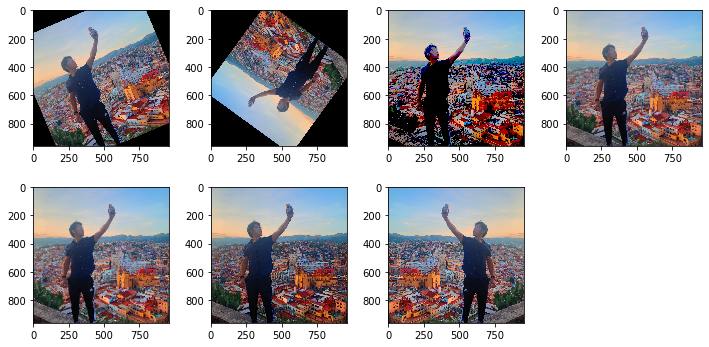

In [108]:
NUM_COLUMNS = 4

ROWS_COUNT = len(fake_images) % NUM_COLUMNS
COLUMNS_COUNT = NUM_COLUMNS

subfig = []

fig = plt.figure(figsize=(12,9))

for i in range(1, len(fake_images)+1):
  subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i))

  img_bgr = cv2.imread('../assets/img/fake_images/'+ str(i-1) + '.jpg')
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

  subfig[i-1].imshow(img_rgb)

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()